This is my first markdown cell.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

ImportError: No module named keras.datasets

(Saving errors for the record because it'll probably work - eventually.)

Got this: ImportError: No module named keras.datasets.

Opening a new terminal from the main jupyter_notebooks tab, to see what I can do with Python.

I have Keras (according to pip list), but not tensorFlow, which python (in the terminal) complains about when I try "import keras". Install by pip and try again? Seems OK. Trying again here.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


ImportError: No module named google.protobuf

(Saving errors.)

ImportError: No module name google.protobuf - although I apparently have protobuf: pip install protobuf gives "Requirement already satisfied". So I'll try to pip uninstall protobuf and then tensorflow and then install tensorflow again.

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


ImportError: cannot import name pywrap_tensorflow

In [3]:
import numpy as np

In [4]:
from tensorflow.python import pywrap_tensorflow

ImportError: cannot import name pywrap_tensorflow

In [5]:
python --version

NameError: name 'python' is not defined

In [6]:
import sys
sys.version_info

sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)

In [1]:
from tensorflow.python import pywrap_tensorflow

So I did File - Close and Halt and then re-opened the notebook to try again. It seems to be working now...

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


Yup.

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

10493952/11490434 [==========================>...] - ETA: 0s

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

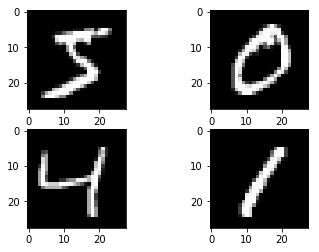

In [5]:
# show the plot
plt.show()

In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()